In [1]:
#Unigram and bigram code goes here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from scipy.sparse import csc_matrix
from scipy.sparse import random
import math 
# import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mihir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mihir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#Importing dataset
trainDf = pd.read_csv('train_processed.csv', sep = ',')
testDf = pd.read_csv('test_processed.csv', sep = ',')

In [4]:
trainDf.head()

,Unnamed: 0,0,1,0.1
0,0,1,0,USER_MENTION when a father is dysfunctional an...
1,1,2,0,USER_MENTION USER_MENTION thanks for lyft cred...
2,2,3,0,bihday your majesty
3,3,4,0,model i love u take with u all the time in urð
4,4,5,0,factsguide society now motivation


In [5]:
# c = trainDf[["0.1"]]
# c.head()

In [6]:
tweetsTrain = pd.DataFrame(trainDf)
tweetsTrain.head()

,Unnamed: 0,0,1,0.1
0,0,1,0,USER_MENTION when a father is dysfunctional an...
1,1,2,0,USER_MENTION USER_MENTION thanks for lyft cred...
2,2,3,0,bihday your majesty
3,3,4,0,model i love u take with u all the time in urð
4,4,5,0,factsguide society now motivation


In [7]:
trainTweetsProc = [] # Creating an empty list to store the data set above.
i = 0
while i < tweetsTrain.shape[0]:
    trainTweetsProc.append([tweetsTrain.iloc[i,1], tweetsTrain.iloc[i,2], tweetsTrain.iloc[i,3]]) # Adds each row to the list, excluding the first column of the data set.
    i += 1

trainTweetsP = pd.DataFrame(trainTweetsProc) # Casts the list to a data frame, which is cleaned.
trainTweetsP.head()

,0,1,2
0,1,0,USER_MENTION when a father is dysfunctional an...
1,2,0,USER_MENTION USER_MENTION thanks for lyft cred...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in urð
4,5,0,factsguide society now motivation


In [8]:
tweetsTraining = trainTweetsP[[2]] # Extracts the tweets column from the clean data frame above.
tweetsTraining.head()

,2
0,USER_MENTION when a father is dysfunctional an...
1,USER_MENTION USER_MENTION thanks for lyft cred...
2,bihday your majesty
3,model i love u take with u all the time in urð
4,factsguide society now motivation


In [9]:
tweetTrainingList = [] # Creating an empty list to store the tweets.
i = 0
while i < tweetsTraining.shape[0]:
    tweetTrainingList.append(tweetsTraining.iloc[i,0]) # Adds each tweet to the list.
    i += 1

In [10]:
stringOfTrainTweets = " ".join(tweetTrainingList) # Joins the tweets together into one giant string, with a space between every two consecutive tweets.

In [11]:
stopWords = set(stopwords.words('english'))
tokens = word_tokenize(stringOfTrainTweets)
wordsFiltered = []

for w in tokens:
    if w not in stopWords:
        wordsFiltered.append(w)

In [12]:
#Creating Unigram

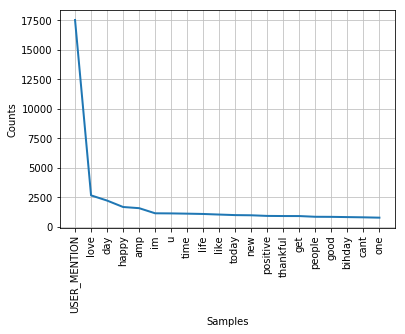

In [13]:
#Plotting unigram
# r = trainDf[["0.1"]]
# trainDf_string = trainDf.to_string()
#creating tokens
# tokens = word_tokenize(stringOfTrainTweets)
vocab = set(wordsFiltered)
frequencyDist = nltk.FreqDist(wordsFiltered)
data = sorted(frequencyDist,key=frequencyDist.__getitem__, reverse=True)
data[0:20]
frequencyDist.plot(20, cumulative=False)

In [14]:
len(vocab) 
# So, proportionally num. of sparse vector = 3440
#and num of dense vector = 20,650

41435

In [15]:
sparseVector = data[0:3430]
denseVector = data[0:20580]
denseVector[0:10]

['USER_MENTION',
 'love',
 'day',
 'happy',
 'amp',
 'im',
 'u',
 'time',
 'life',
 'like']

In [16]:
# def generate_ngrams(s, n):
    
#     # Replace all none alphanumeric characters with spaces
#     s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    
#     # Break sentence in the token, remove empty tokens
#     tokens = [token for token in s.split(" ") if token != ""]
    
#     # Use the zip function to help us generate n-grams
#     # Concatentate the tokens into ngrams and return
#     ngrams = zip(*[token[i:] for i in range(n)])
#     return [" ".join(ngram) for ngram in ngrams]

In [17]:
# a = 'today was so cool. i did nothing. amazing, right?'

In [18]:
# generate_ngrams(a, n=2)

In [19]:
# b = 'time to go home! next time, we will go to the cinema. how does that sound? do you want to go to the cinema?'

In [20]:
# #Trial : To be del.
# tokens = [token for token in stringOfTrainTweets.split(" ") if token != ""]
# output = list(ngrams(tokens, 2))

In [21]:
output = []
i = 0
while i < len(tweetTrainingList):
    tokens1 = word_tokenize(tweetTrainingList[i])
    tweetFil = []
    for w in tokens1:
        if w not in stopWords:
            tweetFil.append(w)
    output.extend(list(ngrams(tweetFil, 2)))
    i += 1

In [22]:
# a = "the weather today is pleasant"
# b = a.split(" ")
# print(b)

In [23]:
# output = []
# i = 0
# while i < len(tweetTrainingList):
#     tokens = [token for token in tweetTrainingList[i].split(" ") if token != ""]
#     output.extend(list(ngrams(tokens, 2)))
#     i += 1

In [24]:
output[0:10]

[('USER_MENTION', 'father'),
 ('father', 'dysfunctional'),
 ('dysfunctional', 'selfish'),
 ('selfish', 'drags'),
 ('drags', 'kids'),
 ('kids', 'dysfunction'),
 ('dysfunction', 'run'),
 ('USER_MENTION', 'USER_MENTION'),
 ('USER_MENTION', 'thanks'),
 ('thanks', 'lyft')]

In [25]:
bigrams = set(output)
frequency_dist = nltk.FreqDist(output)
data1 = sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)
data1[0:20]

[('USER_MENTION', 'USER_MENTION'),
 ('fathers', 'day'),
 ('thankful', 'positive'),
 ('positive', 'affirmation'),
 ('love', 'u'),
 ('cant', 'wait'),
 ('u', 'take'),
 ('take', 'u'),
 ('u', 'time'),
 ('model', 'love'),
 ('time', 'urð'),
 ('i_am', 'positive'),
 ('blog', 'silver'),
 ('silver', 'gold'),
 ('gold', 'forex'),
 ('altwaystoheal', 'healthy'),
 ('via', 'USER_MENTION'),
 ('polar', 'bear'),
 ('whatever', 'want'),
 ('bull', 'dominate')]

In [26]:
len(data1)

161278

In [27]:
len(bigrams)

161278

In [28]:
bigramsVocab = data1[0:830]
bigramsVocab[0:10]

[('USER_MENTION', 'USER_MENTION'),
 ('fathers', 'day'),
 ('thankful', 'positive'),
 ('positive', 'affirmation'),
 ('love', 'u'),
 ('cant', 'wait'),
 ('u', 'take'),
 ('take', 'u'),
 ('u', 'time'),
 ('model', 'love')]

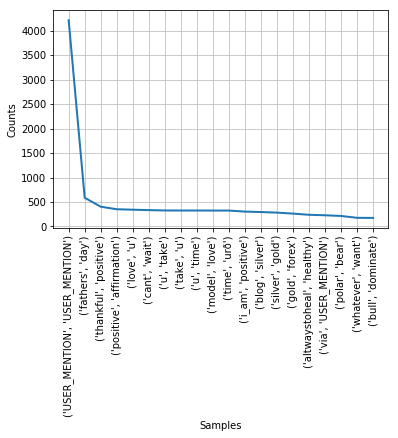

In [29]:
frequency_dist.plot(20, cumulative=False)

In [30]:
vectorizer = CountVectorizer()
>>> vectorizer   

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [31]:
# corpus = [
# ...     'This is the first document.',
# ...     'This is the second second document.',
# ...     'And the third one.',
# ...     'Is this the first document?',
# ... ]
# X = vectorizer.fit_transform(corpus)
# >>> X     

In [32]:
# vectorizer.get_feature_names() == (
# ...     ['and', 'document', 'first', 'is', 'one',
# ...      'second', 'the', 'third', 'this'])

In [33]:
# vectorizer.get_feature_names()

In [34]:
# extract = ['he went to the mall to watch a movie', 'he watched a movie', 'he went cycling with his friends', 'he cooks delicious food']
# extractFil = []
# i = 0
# while i < len(extract):
#     tokens1 = word_tokenize(extract[i])
#     tweetFil = []
#     for w in tokens1:
#         if w not in stopWords:
#             tweetFil.append(w)
#     extractFil.append(" ".join(tweetFil))
#     i += 1
# outputA = []
# i = 0
# while i < len(extract):
#     tokens1 = word_tokenize(extract[i])
#     tweetFil = []
#     for w in tokens1:
#         if w not in stopWords:
#             tweetFil.append(w)
#     outputA.extend(list(ngrams(tweetFil, 1)))
#     i += 1
# setA = set(outputA)
# outputB = []
# i = 0
# while i < len(extract):
#     tokens1 = word_tokenize(extract[i])
#     tweetFil = []
#     for w in tokens1:
#         if w not in stopWords:
#             tweetFil.append(w)
#     outputB.extend(list(ngrams(tweetFil, 2)))
#     i += 1
# setB = set(outputB)
# # len(set(outputA))+len(vectorizer.get_feature_names())
# len(setA)+len(setB)

In [35]:
# words = ['he', 'went', 'to', 'the', 'mall', 'watch', 'a', 'movie', 'the mall']
# M = vectorizer.fit_transform(words)
# vectorizer.get_feature_names()

In [36]:
# A = M.toarray()

In [37]:
# M.toarray()

In [38]:
# print(A[2])

In [39]:
# X.toarray()

In [40]:
# vectorizer.vocabulary_.get('document')

In [41]:
# vectorizer.transform(['Something completely new.']).toarray()

In [42]:
tweetTrainingList[30000]

'i will never msg him first if he dun msg me firstdisappointed'

In [43]:
tweetListFiltered = []
for element in tweetTrainingList:
    words = word_tokenize(element)
    wordsFiltered = []

    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)
    tweetListFiltered.append(" ".join(wordsFiltered))

In [44]:
tweetListFiltered[30000]

'never msg first dun msg firstdisappointed'

In [45]:
from scipy import sparse 
# >>> bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),
# ...                                     token_pattern=r'\b\w+\b', min_df=1)
# >>> analyze = bigram_vectorizer.build_analyzer()
# # tweetListVectors = bigram_vectorizer.fit_transform(tweetListFiltered).toarray()
# tweetVectorsA = sparse.lil_matrix(bigram_vectorizer.fit_transform(tweetListFiltered[0:5000]).toarray())

# # tweetListVectors
# # >>> analyze('Bi-grams are cool!') == (
# # ...     ['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool'])

In [46]:
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])
print(a+b)

[ 7  9 11 13 15]


In [47]:
csc_matrix((3, 4), dtype=np.int8).toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [48]:
def get_sparse_size(matrix):
    # get size of a sparse matrix
    return int((matrix.data.nbytes + matrix.indptr.nbytes + matrix.indices.nbytes) / 1024.)

In [49]:
# create a sparse matrix, 1000 x 100000
sparse_mat = random(10 ** 3, 10 ** 5, format='csr')

In [50]:
# get size of a sparse matrix
sparse_size = get_sparse_size(sparse_mat)

In [51]:
# convert sparse matrix to a regular matrix and get its size
regular_size = sparse_mat.toarray().nbytes / 1024.

In [52]:
print("The size of sparse matrix is %s KiB" % sparse_size)
print("The size of regular matrix is %s KiB" % regular_size)
print("Data compression ratio is %s" % (regular_size / sparse_size))

The size of sparse matrix is 11722 KiB
The size of regular matrix is 781250.0 KiB
Data compression ratio is 66.6481829039413


In [53]:
np.random.seed(10)
matrix = random(3, 3, format='lil', density=0.6)
matrix.toarray()

array([[0.        , 0.08833981, 0.16911084],
       [0.        , 0.        , 0.        ],
       [0.19806286, 0.76053071, 0.22479665]])

In [54]:
matrix.data

array([list([0.08833981417401027, 0.16911083656253545]), list([]),
       list([0.19806286475962398, 0.7605307121989587, 0.22479664553084766])],
      dtype=object)

In [55]:
matrix.rows

array([list([1, 2]), list([]), list([0, 1, 2])], dtype=object)

In [56]:
def get_item(row_index, column_index, matrix):
    row_values = matrix.data[row_index]
    row_indices = matrix.rows[row_index]

    value_index = row_indices.index(column_index)
    if value_index >= 0:
        return row_values[value_index]
    else:
        return 0

In [57]:
print(matrix[2, 2])

0.22479664553084766


In [58]:
# analyze(extract[0])

In [59]:
# bigr_vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1)
# analyz = bigr_vectorizer.build_analyzer()
# wordSet = []
# for element in extract:
#     wordSet.extend(analyze(element))
# wordSet

In [60]:
# X_2 = bigram_vectorizer.fit_transform(corpus).toarray()
# >>> X_2

In [61]:
corpus = [
...     'this is the first document',
...     'this is the second second document',
...     'and the third one',
...     'is this the first document',
... ]
    
listOfTokens = ['this', 'is', 'the', 'first', 'first document', 'second document']
[1,1,1,1,1,0]

[1, 1, 1, 1, 1, 0]

In [62]:
# feature_index = bigram_vectorizer.vocabulary_.get('is this')
# >>> X_2[:, feature_index] 

In [63]:
sparseVector.extend(bigramsVocab)

In [64]:
sparseVector[3431:3435]

[('fathers', 'day'),
 ('thankful', 'positive'),
 ('positive', 'affirmation'),
 ('love', 'u')]

In [65]:
sparseVectorMod = sparseVector

In [66]:
i = 3430
while i < len(sparseVectorMod):
    element = " ".join(sparseVectorMod[i])
    sparseVectorMod[i] = element
    i += 1

In [67]:
sparseVectorMod[3431:3435]

['fathers day', 'thankful positive', 'positive affirmation', 'love u']

In [68]:
sparseVectorA = sparseVectorMod[0:3430]

In [69]:
print(sparseVectorA[0])
print(sparseVectorA[3429])

USER_MENTION
instalikeâ


In [70]:
sparseVectorB = sparseVectorMod[3430:4260]

In [71]:
print(sparseVectorB[0])
print(sparseVectorB[829])

USER_MENTION USER_MENTION
love summer


In [73]:
tweetVectors = []
i = 0
while i < len(tweetListFiltered):
    tweetWords = tweetListFiltered[i].split()
    vector = []
    for element in sparseVectorA:
        j = 0
        k = 0
        while j < len(tweetWords):
            if tweetWords[j] == element:
                k += 1
            j += 1
        vector.append(k)
    for element in sparseVectorB:
        bigramWords = element.split()
        j = 0
        k = 0
        while j < len(tweetWords)-1:
            if tweetWords[j] == bigramWords[0] and tweetWords[j+1] == bigramWords[1]:
                k += 1
            j += 1
        vector.append(k)
    tweetVectors.append(vector)
    i += 1
# tweetVectors = np.array([])
# tweetVectors = np.append(tweetVectors, [1, 3, 4])
# tweetVectors = np.append(tweetVectors, [1, 3, 4])
# tweetVectors = np.append(tweetVectors, 1)
# tweetVectors = np.append(tweetVectors, 2)
# tweetVectors.append(1)
# tweetVectors


In [74]:
numTweetsWTerm = []
for element in sparseVectorA:
    m = 0
    for tweet in tweetListFiltered:
        tweetWords = tweet.split()
        if element in tweetWords:
            m += 1
    numTweetsWTerm.append(m)
for element in sparseVectorB:
    m = 0
    for tweet in tweetListFiltered:
        tweetWords = tweet.split()
        big = list(ngrams(tweetWords, 2))
        bigrams = []
        for part in big:
            portion = " ".join(part)
            bigrams.append(portion)
        if element in bigrams:
            m += 1
    numTweetsWTerm.append(m)


In [75]:
len(numTweetsWTerm)

4260

In [76]:
numTweetsWTerm[0:10]

[11098, 2515, 2062, 1593, 1428, 1077, 717, 1090, 1016, 994]

In [77]:
numTweetsWTerm[4250:4260]

[12, 12, 12, 12, 12, 12, 12, 12, 12, 12]

In [78]:
# svB = ['cute kitten', 'to all']
# texts = ['hello how are you', 'hello to all whats up', 'hello to all the people out there', 'thats a cute kitten']
# numTexts = []
# for element in svB:
#     m = 0
#     for text in texts:
#         words = text.split()
#         big = list(ngrams(words, 2))
#         bigrams = []
#         for part in big:
#             portion = " ".join(part)
#             bigrams.append(portion)
#         if element in bigrams:
#             m += 1
#     numTexts.append(m)
# print(numTexts)

In [79]:
# svA = ['hello', 'to', 'kitten']
# numTxts = []
# for element in svA:
#     m = 0
#     for text in texts:
#         words = text.split()
#         if element in words:
#             m += 1
#     numTxts.append(m)
# print(numTxts)

In [80]:

# big = list(ngrams(texts[0].split(), 2))
# for part in big:
#     portion = " ".join(part)
#     part = portion
# big

In [81]:
tweetVectorsIDF = []
for element in tweetVectors:
    i = 0
    vector = []
    for piece in element:
        term = math.log10((1+len(tweetListFiltered))/(1+numTweetsWTerm[i]))+1
        newTerm = piece * term
        vector.append(newTerm)
        i += 1
    tweetVectorsIDF.append(vector)

In [82]:
# vectorsAA = [[1,2,3],[1,5,9],[1,1,8]]
# numTextsAppears = [50,21,3]
# vectorsIDF = []
# for element in vectorsAA:
#     i = 0
#     vector = []
#     for piece in element:
#         term = math.log10((1+800)/(1+numTextsAppears[i]))+1
#         newTerm = piece * term
#         vector.append(newTerm)
#         i += 1
#     vectorsIDF.append(vector)
# print(vectorsIDF)

In [83]:
# tweetVectorsIDF[5][0:20]

In [84]:
# tweetVectors[5]

In [85]:
# len(tweetVectorsIDF)

In [86]:
idfVectors = np.array(tweetVectorsIDF)

In [87]:
# idfVectors[5][0:20]

In [88]:
tweetVectors1 = []
for tweet in tweetListFiltered:
    tweetWords = tweet.split()
    bigr = list(ngrams(tweetWords, 2))
    bigrams = []
    for part in bigr:
        portion = " ".join(part)
        bigrams.append(portion)
    vector = []
    for element in sparseVectorA:
        if element in tweetWords:
            k = 1
        else:
            k = 0
        vector.append(k)
    for element in sparseVectorB:
        if element in bigrams:
            k = 1
        else:
            k = 0
        vector.append(k)
    tweetVectors1.append(vector)


In [89]:
len(tweetVectors1)

31962

In [90]:
tweetVectors1[500][5:8]

[0, 0, 0]

In [91]:
sparseVectorA[10]

'today'

In [92]:
sparseVectorA.index('talking')

572

In [93]:
tweetVectorsA = np.array(tweetVectors1)

In [94]:
# svA = ['hello', 'how', 'all', 'people']
# svB = ['cute kitten', 'to all']
# texts = ['hello how are you', 'hello to all whats up', 'hello to all the people out there', 'thats a cute kitten']
# vectors = []
# for tweet in texts:
#     tweetWords = tweet.split()
#     bigr = list(ngrams(tweetWords, 2))
#     bigrams = []
#     for part in bigr:
#         portion = " ".join(part)
#         bigrams.append(portion)
#     vector = []
#     for element in svA:
#         if element in tweetWords:
#             k = 1
#         else:
#             k = 0
#         vector.append(k)
#     for element in svB:
#         if element in bigrams:
#             k = 1
#         else:
#             k = 0
#         vector.append(k)
#     vectors.append(vector)
# print(vectors)

# Classification Techniques

# Vaibhav

In [95]:
# Decison Tree Classifier

In [96]:
# tweetVectorA: sparse vector rep. in terms of presence
# trainTweetsP: dataframe containing all training tweet and their sentiment

In [97]:
#Libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [98]:
# tweetVectorsA?

In [99]:
# trainTweetsP?

In [100]:
#70:30 Train:Test

In [101]:
# len(tweetVectorsA) = 31962

In [102]:
x = tweetVectorsA[0:22373] #Independent variable
y = trainTweetsP[1][0:22373].to_numpy() #Dependent variable

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split( x, 
                                                     y, 
                                                    test_size = 0.3, 
                                                    random_state = 100)

In [104]:
#Descision Tree Classifier 

In [105]:
dtc_gini = DecisionTreeClassifier(criterion='gini',random_state=100, max_depth=5)

In [106]:
dtc_gini.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [107]:
Y_pred = dtc_gini.predict(X_test)

In [108]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
print("Accuracy of Decision Tree (gini index) on test data: ", accuracy_score(Y_test, Y_pred)*100)

Accuracy of Decision Tree (gini index) on test data:  93.77234803337306


In [110]:
#Conclusion: DTC accuracy is largely unaffected by different ratios for test and train data

In [111]:
#Goal: Random Forest + xgBoost

In [112]:
#Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30) #Using 30 random trees has given the best accuracy overall
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [114]:
model.score(X_test,Y_test) #score of how accurately model has been trained

0.950834326579261

In [115]:
Y_predict = model.predict(X_test)

In [116]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_predict)

In [117]:
import seaborn
import matplotlib.pyplot as plt

Text(33.0, 0.5, 'Truth')

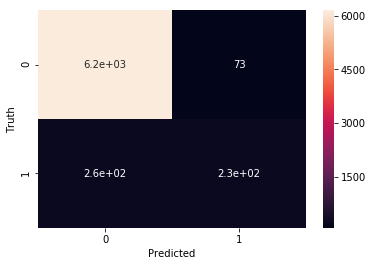

In [118]:
seaborn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [119]:
print("Accuracy of Random Forest on Test data: ", accuracy_score(Y_test, Y_pred)*100)

Accuracy of Random Forest on Test data:  93.77234803337306


In [120]:
#XGBoost Classifier

In [121]:
# from xgboost import XGBClassifier

In [122]:
# model = XGBClassifier()
# model.fit(X_train, Y_train)

In [123]:
# Y_pred = model.predict(X_test)

In [124]:
# print("Accuracy of xgBoost on Test data:" ,accuracy_score(Y_test, Y_pred))

In [125]:
#Multi-Layer Perceptron

In [126]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.14.0


In [127]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 41435

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 100))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

W0801 17:16:58.094153  6628 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0801 17:16:58.152697  6628 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         4143500   
_________________________________________________________________
global_average_pooling1d (Gl (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                1616      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 4,145,133
Trainable params: 4,145,133
Non-trainable params: 0
_________________________________________________________________


In [128]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

W0801 17:17:00.356142  6628 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [130]:
history = model.fit(X_train,
                    Y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(X_test, Y_test),
                    verbose=1)    

Train on 15661 samples, validate on 6712 samples
Epoch 1/40
 6656/15661 [===========>..................] - ETA: 26s - loss: 0.4432 - acc: 0.9313

KeyboardInterrupt: 

In [ ]:
results = model.evaluate(X_test, Y_test)

print(results)

In [ ]:
#Model has achieved an accuracy of 92.74%

# Mihir

In [131]:
# Importing libraries for Naive Bayes Classification and for accuracy checking. 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [132]:
# GaussianNB model
model = GaussianNB()

In [133]:
# MultinomialNB model
model1 = MultinomialNB()

In [134]:
# BernoulliNB model
model2 = BernoulliNB()

In [135]:
# Setting the training data to be the tweet vectors for presence feature type. 
x2 = tweetVectorsA[0:25570]
# Setting the corresponding sentiment label for each tweet vector.
y2 = trainTweetsP[1][0:25570].to_numpy()

In [136]:
# Using GaussianNB model to train the training data and sentiment labels.
model.fit(x2, y2)

GaussianNB(priors=None, var_smoothing=1e-09)

In [137]:
# Using the GaussianNB model, after training, to predict the sentiment labels of test tweets, whose actual 
# sentiment labels are known.
predicted6 = model.predict(tweetVectorsA[25570:31962])

In [138]:
# Checking the accuracy of the model, based on the percentage of test tweets whose sentiment labels were 
# accurately predicted.
accuracy_score(trainTweetsP[1][25570:31962].to_numpy(), predicted6)*100

78.95807259073842

In [139]:
# Repeating the above three steps of training, predicting, and accuracy checking, with MultinomialNB model. 

In [140]:
model1.fit(x2, y2)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [141]:
predicted7 = model1.predict(tweetVectorsA[25570:31962])

In [142]:
accuracy_score(trainTweetsP[1][25570:31962].to_numpy(), predicted7)*100

94.50876095118899

In [143]:
# Repeating the above three steps of training, predicting, and accuracy checking, with BernoulliNB model. 

In [144]:
model2.fit(x2, y2)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [145]:
predicted8 = model2.predict(tweetVectorsA[25570:31962])

In [146]:
accuracy_score(trainTweetsP[1][25570:31962].to_numpy(), predicted8)*100

94.55569461827284

In [147]:
# Now, setting the training data to be the tweet vectors for frequency feature type.
x3 = idfVectors[0:25570]

In [148]:
# Performing the three steps of training, predicting, and accuracy checking, with each of the three 
# Naive Bayes models, using the frequency vectors for tweets.

In [149]:
model.fit(x3, y2)

GaussianNB(priors=None, var_smoothing=1e-09)

In [150]:
predicted9 = model.predict(idfVectors[25570:31962])

In [151]:
accuracy_score(trainTweetsP[1][25570:31962].to_numpy(), predicted9)*100

78.92678347934918

In [152]:
model1.fit(x3, y2)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [153]:
predicted10 = model1.predict(idfVectors[25570:31962])

In [154]:
accuracy_score(trainTweetsP[1][25570:31962].to_numpy(), predicted10)*100

91.80225281602003

In [155]:
model2.fit(x3, y2)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [156]:
predicted11 = model2.predict(idfVectors[25570:31962])

In [157]:
accuracy_score(trainTweetsP[1][25570:31962].to_numpy(), predicted11)*100

94.55569461827284

In [ ]:
# Importing libraries for performing sequential Logistic Regression using keras.
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2

In [ ]:
# Setting the relevant training data and actual outputs, similar to those used in Naive Bayes. 
xTrain1 = tweetVectorsA[0:25570]
xTrain2 = idfVectors[0:25570]
yTrain = trainTweetsP[1][0:25570].to_numpy()
xVal1 = tweetVectorsA[25570:31962]
xVal2 = idfVectors[25570:31962]
yVal = trainTweetsP[1][25570:31962].to_numpy()

In [ ]:
# Building up the model for sequential Logistic Regression using keras. 

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(1, activation='sigmoid', kernel_regularizer=L1L2(l1=0.0, l2=0.1), input_dim=len(idfVectors[1])))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Using the model to train the data for presence vectors representing tweets.
model.fit(xTrain1, yTrain, epochs=100, validation_data=(xVal1, yVal))

In [ ]:
# Using the model, after training, to predict the sentiment labels of the test tweets represented by 
# presence vectors, whose actual sentiment labels are known. 
predictions = model.predict(xVal1).round()

In [ ]:
# Checking the accuracy of the model, based on the percentage of test tweets whose sentiment labels were 
# accurately predicted.
accuracy_score(yVal, predictions)*100

In [ ]:
# Importing library for SVM classification.
from sklearn import svm

In [ ]:
# Building up the SVM model.
clf = svm.SVC(gamma='scale')

In [ ]:
# Setting the training data, tweet vectors for presence, and actual outputs, sentiment labels. 
xA = tweetVectorsA[0:2000]
yA = trainTweetsP[1][0:2000].to_numpy()

In [ ]:
# Using the SVM model to train the data. 
clf.fit(xA, yA)

In [ ]:
# Using the model, after training, to predict the sentiment labels of test tweets represented by 
# presence vectors, whose actual sentiment labels are known. Also, checking the accuracy of the model,
# based on the percentage of test tweets whose sentiment labels were accurately predicted. To account for 
# available memory, the test tweets are split into multiple groups and the accuracy of each group is determined. 

In [ ]:
A = clf.predict(tweetVectorsA[2000:4000])

In [ ]:
accuracy_score(trainTweetsP[1][2000:4000].to_numpy(), A)*100

In [ ]:
B = clf.predict(tweetVectorsA[4000:6500])
accuracy_score(trainTweetsP[1][4000:6500].to_numpy(), B)*100

In [ ]:
C = clf.predict(tweetVectorsA[6500:9000])
accuracy_score(trainTweetsP[1][6500:9000].to_numpy(), C)*100

In [ ]:
D = clf.predict(tweetVectorsA[9000:11500])
accuracy_score(trainTweetsP[1][9000:11500].to_numpy(), D)*100

In [ ]:
E = clf.predict(tweetVectorsA[11500:14000])
accuracy_score(trainTweetsP[1][11500:14000].to_numpy(), E)*100

In [ ]:
F = clf.predict(tweetVectorsA[14000:16500])
accuracy_score(trainTweetsP[1][14000:16500].to_numpy(), F)*100

In [ ]:
G = clf.predict(tweetVectorsA[16500:19000])
accuracy_score(trainTweetsP[1][16500:19000].to_numpy(), G)*100

In [ ]:
H = clf.predict(tweetVectorsA[19000:21500])
accuracy_score(trainTweetsP[1][19000:21500].to_numpy(), H)*100

In [ ]:
I = clf.predict(tweetVectorsA[21500:24000])
accuracy_score(trainTweetsP[1][21500:24000].to_numpy(), I)*100

In [ ]:
J = clf.predict(tweetVectorsA[24000:26500])
accuracy_score(trainTweetsP[1][24000:26500].to_numpy(), J)*100

In [ ]:
K = clf.predict(tweetVectorsA[26500:29000])
accuracy_score(trainTweetsP[1][26500:29000].to_numpy(), K)*100

In [ ]:
L = clf.predict(tweetVectorsA[29000:31962])
accuracy_score(trainTweetsP[1][29000:31962].to_numpy(), L)*100

In [ ]:
# Following the above steps, the general accuracy for the all the test tweets is determined manually using a calculator.
# This accuracy is determined to be 93.67%, for presence vectors. 

In [ ]:
# Setting the training data, tweet vectors for frequency, and actual outputs, sentiment labels. 
xB = idfVectors[0:2000]
yB = trainTweetsP[1][0:2000].to_numpy()

In [ ]:
# Using the SVM model to train the data.
clf.fit(xB, yB)

In [ ]:
# Using the model, after training, to predict the sentiment labels of test tweets represented by 
# frequency vectors, whose actual sentiment labels are known. Also, checking the accuracy of the model,
# based on the percentage of test tweets whose sentiment labels were accurately predicted. To account for 
# available memory, the test tweets are split into multiple groups and the accuracy of each group is determined.

In [ ]:
a = clf.predict(idfVectors[2000:4500])
accuracy_score(trainTweetsP[1][2000:4500].to_numpy(), a)*100

In [ ]:
b = clf.predict(idfVectors[4500:7000])
accuracy_score(trainTweetsP[1][4500:7000].to_numpy(), b)*100

In [ ]:
c = clf.predict(idfVectors[7000:9500])
accuracy_score(trainTweetsP[1][7000:9500].to_numpy(), c)*100

In [ ]:
d = clf.predict(idfVectors[9500:12000])
accuracy_score(trainTweetsP[1][9500:12000].to_numpy(), d)*100

In [ ]:
e = clf.predict(idfVectors[12000:14500])
accuracy_score(trainTweetsP[1][12000:14500].to_numpy(), e)*100

In [ ]:
f = clf.predict(idfVectors[14500:17000])
accuracy_score(trainTweetsP[1][14500:17000].to_numpy(), f)*100

In [ ]:
g = clf.predict(idfVectors[17000:19500])
accuracy_score(trainTweetsP[1][17000:19500].to_numpy(), g)*100

In [ ]:
h = clf.predict(idfVectors[19500:22000])
accuracy_score(trainTweetsP[1][19500:22000].to_numpy(), h)*100

In [ ]:
i = clf.predict(idfVectors[22000:24500])
accuracy_score(trainTweetsP[1][22000:24500].to_numpy(), i)*100

In [ ]:
j = clf.predict(idfVectors[24500:27000])
accuracy_score(trainTweetsP[1][24500:27000].to_numpy(), j)*100

In [ ]:
k = clf.predict(idfVectors[27000:29500])
accuracy_score(trainTweetsP[1][27000:29500].to_numpy(), k)*100

In [ ]:
l = clf.predict(idfVectors[29500:31962])
accuracy_score(trainTweetsP[1][29500:31962].to_numpy(), l)*100

In [ ]:
# Following the above steps, the general accuracy for the all the test tweets is determined manually using a calculator.
# This accuracy is determined to be 93.66%, for frequency vectors.

In [196]:
# Random data set
pilotTweets = ['the people at the hotel were really nice and friendly but the rooms were dirty and poorly maintained',

'i had a great dining experience at this restaurant but its location made it almost impossible to find',

'i enjoyed laughing through as i watched the movie it was humorous even though the starting and ending were absolutely terrible',

 'i loved the facilities at this hotel however the hotel manager almost ruined my experience through his rude behaviour towards us',

'great food lovely people totally stinky toilets', 

'i loved beating these two terrible human beings i would never recommend that anyone use her lawyer he is a total loser',

'dopey im worth 8 billion and youre worth peanuts without my show nobody would even know who you are',


'the emmys are soo boring terrible show im going to watch football i already know the winners good night',

'i went to wharton made over 8 billion employ thousands of people get insulted by morons who cant get enough of me on twitter',

'isnt it crazy im worth billions of dollars employ thousands of people and get libeled by moron bloggers who cant afford a suit wild',

'all i wanted after the movie finished was my money back', 

'i just got ripped off by this coffee place for a small cup of coffee', 

'one may not like the ambience of shanghai restaurant but its food is still the best in town', 

'anybody else think avengers is overrated superhero movies are all fake',

'the red hen restaurant should focus more on cleaning its filthy canopies doors and windows badly needs a paint job rather than refusing to serve a fine person like sarah huckabee sanders i always had a rule if a restaurant is dirty on the outside it is dirty on the inside', 

'lowest rated oscars in history problem is we dont have stars anymore except your president', 

'rex tillerson never threatened to resign this is fake news put out by USER_MENTION low news and reporting standards no verification from me', 

'maybe ask him if they can build a better spell check that also fixes your random capitalization on your phone', 

'katy what were you thinking when you married loser russell thats a waste man', 

'sorry losers and haters but my iq is one of the highest please dont feel so stupid and insecure its not your fault'
]

In [187]:
# Test data subset
pilotTweets = ['first ever time in government buildings oireachtas leinsterhouse dublin parliment', 
               'USER_MENTION USER_MENTION in many things modi government is doing good but sadly some stupid chamcha guys r heads of impoant bodies',
               'USER_MENTION allahsoil remember the good old days when the government was actually running a surplus',
               'racism in us amp netanyahu commitment to genocide explain it bbcnews msnbc npr cnn wsj huffpostpol nyt wapoâ',
               'really terrible mass terrorist attack in usa night club blackday USER_MENTION USER_MENTION USER_MENTION',
               'ways to be more optimistic optimism',
               'new adventures fun peace love livelife befree yolo newadventures beautifulâ',
               'fathersday fatherday from USER_MENTION team',
               'happy fathers day fathers day fathersday dad ilovemydad ilovemyfather love',
               'USER_MENTION USER_MENTION bonne fãªte jeff bihday to you happy bihday to you jeff happy bihday happybihdayyhâ']

In [ ]:
# Movie reviews for Spider-Man: Far From Home
pilotTweets = ["its not quite the homerun of homecoming but far from home isnt far from matching it with heaps of humour energetic action and the answers endgame left you craving", 
               "simultaneously humorous and heartfelt entertaining and angsty this actionpacked sequel is an exploration of peter parkers grief and moving on in a postendgame world", 
               "director jon watts ensures spiderman far from home feels bigger in scope than homecoming and not just because it has elementals the size of buildings", 
               "spider man far from home starring tom holland and zendaya hit the screens this week the film is a light and breezy watch consider it as a break after the emotional intensity of avengers endgame",
               "the high school drama is what makes the film watchable",
               "few good surprising moments in spiderman far from home makes it a worthy watch",
               "the best parts of the film arent the action sequences but the teasing banter and peergroup dynamics that are injected with lifeordeath stakes thanks to peters stillkindasecret identity",
               "spiderman far from home fails to strike a balance and as a result feels altogether too confused to make a lasting impression on the new age fans of this marvel boot up",
               "far from home is a fine fun serviceable superhero flick but like peter parkers european vacation it contains some unwelcome surprises too",
               "its more urgent than the last one and should be even bigger at the box office with a richer sense of malevolence"]

In [ ]:
# Restaurant reviews for Marche Movenpick VivoCity
pilotTweets = ["the service and the food are equally good the service crew lagi shows a lot of patience while we deciding which table to sit", 
               "so glad to see marches discount offer on eatigo you can have a swiss sausage rosti spanish paella italian burrata mexican guacamole and german beer all at one place at half the price on a saturday linner", 
               "good to go during weekdays during lunch no frills set lunch which is at a reasonable pricing with drinks", 
               "food selection was not great and taste was average only only chose this place for the kids play area staff had a difficult time with the time because we bought chope vouchers",
               "has been such a long time since we visited marche it is still the same as before quality of food is still there food is freshly prepared on the spot juice is also fresh",
               "disappointed cramped space poor choice n quality of food rude staff at grilled platter asked him how long i need to wait mins he said just wait for buzzer thats whats its for there was no q at all i should have known better",
               "this place gives you a card and there are various counters of different food courses where you can order receive the food and pay using the card and finally you pay based on your food selections",
               "came back for the pizza because i really enjoyed it the previous time prawn i was here and again the pizza minced beef was great the rosti was good as well",
               "their rosti are so nice love their rosti had the pasta as well not bad but the pasta is not cooked al dente too soggy",
               "we had to queue for dinner on a saturday night but it was not too long given the time of day"]

In [197]:
pilotTweetsFiltered = []
for element in pilotTweets:
    words = word_tokenize(element)
    wordsFiltered = []

    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)
    pilotTweetsFiltered.append(" ".join(wordsFiltered))

In [198]:
tweetVectors = []
i = 0
while i < len(pilotTweetsFiltered):
    tweetWords = pilotTweetsFiltered[i].split()
    vector = []
    for element in sparseVectorA:
        j = 0
        k = 0
        while j < len(tweetWords):
            if tweetWords[j] == element:
                k += 1
            j += 1
        vector.append(k)
    for element in sparseVectorB:
        bigramWords = element.split()
        j = 0
        k = 0
        while j < len(tweetWords)-1:
            if tweetWords[j] == bigramWords[0] and tweetWords[j+1] == bigramWords[1]:
                k += 1
            j += 1
        vector.append(k)
    tweetVectors.append(vector)
    i += 1
# tweetVectors = np.array([])
# tweetVectors = np.append(tweetVectors, [1, 3, 4])
# tweetVectors = np.append(tweetVectors, [1, 3, 4])
# tweetVectors = np.append(tweetVectors, 1)
# tweetVectors = np.append(tweetVectors, 2)
# tweetVectors.append(1)
# tweetVectors

In [199]:
numPTweetsWTerm = []
for element in sparseVectorA:
    m = 0
    for tweet in pilotTweetsFiltered:
        tweetWords = tweet.split()
        if element in tweetWords:
            m += 1
    numPTweetsWTerm.append(m)
for element in sparseVectorB:
    m = 0
    for tweet in pilotTweetsFiltered:
        tweetWords = tweet.split()
        big = list(ngrams(tweetWords, 2))
        bigrams = []
        for part in big:
            portion = " ".join(part)
            bigrams.append(portion)
        if element in bigrams:
            m += 1
    numPTweetsWTerm.append(m)

In [200]:
tweetPVectorsIDF = []
for element in tweetVectors:
    i = 0
    vector = []
    for piece in element:
        term = math.log10((1+len(pilotTweetsFiltered))/(1+numPTweetsWTerm[i]))+1
        newTerm = piece * term
        vector.append(newTerm)
        i += 1
    tweetPVectorsIDF.append(vector)

In [201]:
idfPVectors = np.array(tweetPVectorsIDF)

In [202]:
tweetVectors2 = []
for tweet in pilotTweetsFiltered:
    tweetWords = tweet.split()
    bigr = list(ngrams(tweetWords, 2))
    bigrams = []
    for part in bigr:
        portion = " ".join(part)
        bigrams.append(portion)
    vector = []
    for element in sparseVectorA:
        if element in tweetWords:
            k = 1
        else:
            k = 0
        vector.append(k)
    for element in sparseVectorB:
        if element in bigrams:
            k = 1
        else:
            k = 0
        vector.append(k)
    tweetVectors2.append(vector)

In [203]:
tweetVectorsB = np.array(tweetVectors2)

In [204]:
print(model2.predict(idfPVectors))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1]
